<a href="https://colab.research.google.com/github/ramakrishnabhavana/Bhavana-sML/blob/main/ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Not needed

In [ ]:
import sklearn as skl

print(skl)

<module 'sklearn' from '/usr/local/lib/python3.11/dist-packages/sklearn/__init__.py'>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
img = Image.open('images.jpg')

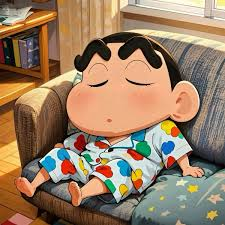

In [ ]:
img

SKlearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
X = [[ 1,  2,  3],  # 2 samples, 3 features
     [11, 12, 13]]
y = [2, 1]  # classes of each sample
clf.fit(X, y)
RandomForestClassifier(random_state=0)

clf.predict([[0, 3, 0], [4, 15, 16]])  # predict classes of the training data


array([2, 1])

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 1.0


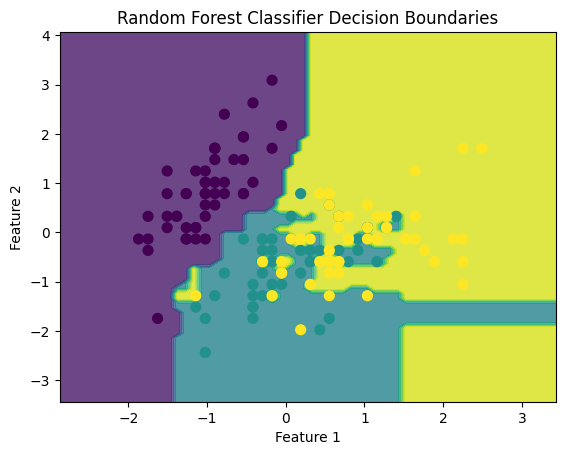

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features for 2D visualization
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict classes for each point on the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors= 'face', marker='o', s=50)
plt.title("Random Forest Classifier Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


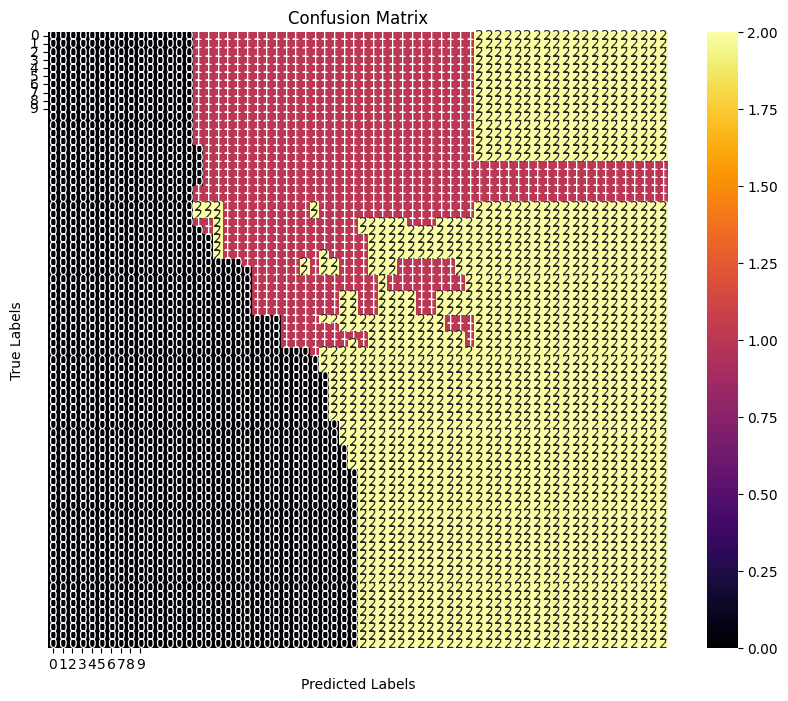

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(Z, annot=True, fmt='d', cmap='inferno', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8823 - loss: 0.4215 - val_accuracy: 0.9619 - val_loss: 0.1328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9648 - loss: 0.1220 - val_accuracy: 0.9728 - val_loss: 0.0920
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9761 - loss: 0.0787 - val_accuracy: 0.9748 - val_loss: 0.0834
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0577 - val_accuracy: 0.9737 - val_loss: 0.0825
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9776 - val_loss: 0.0743


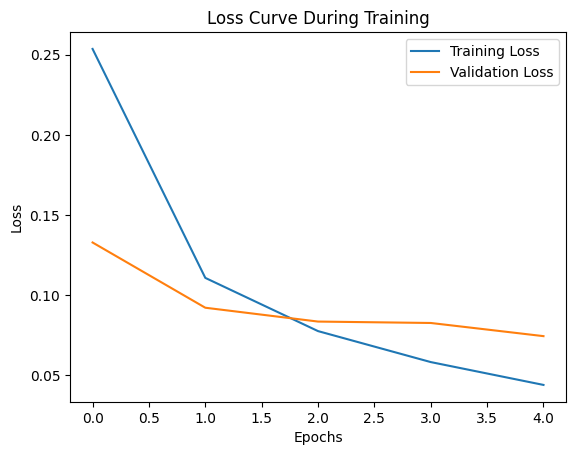

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history for plotting
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8806 - loss: 0.4305
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


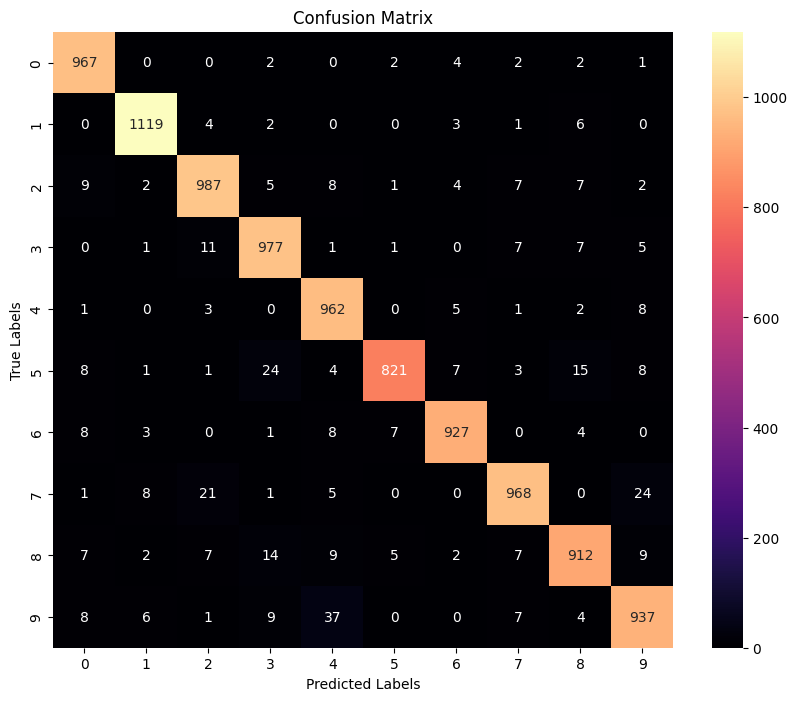

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


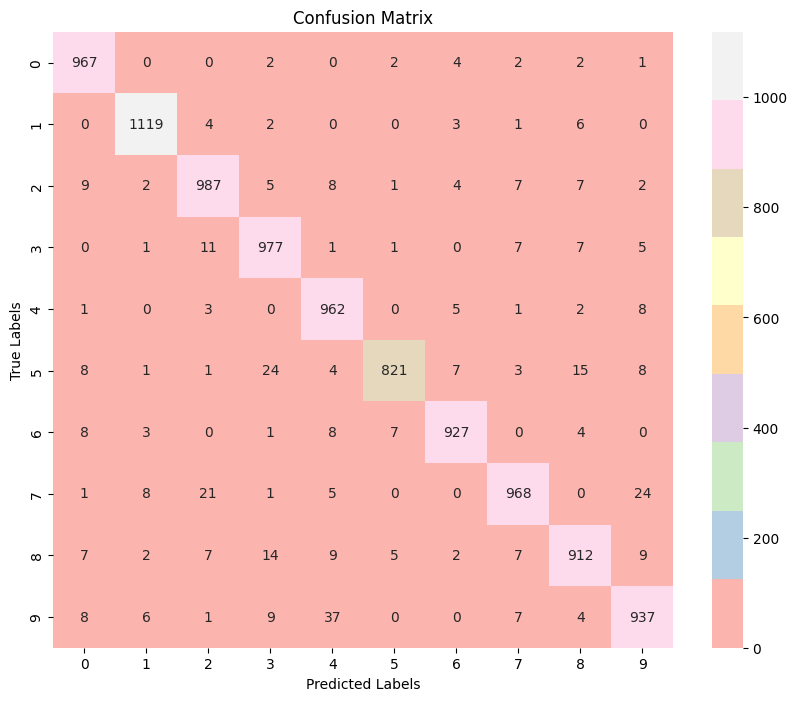

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1st week


In [ ]:
'''df = pd.read_csv('your_dataset.csv')
df.head()
df.describe()
df.info()
df.sample()
df.columns
age=df['Age']
print(age)
df[['Age','BMI']].head()
df[0:4]
iloc()
loc()
df.rename(columns={"Age":"age"}).head()
chain of function call
df.drop(labels=['Age','BMI'],axis=1,index/rows=None,columns=None,inplace=True) # if false then retuns th copy if true none
print(df.duplicated().sum())
df_no_duplicates = df.drop_duplicates()
df['Column1'] = df['Column1'].astype(float)
df_encode=pd.get_dummies(df,columns=[car_brand])
uci repository
random_state
steps involved in ml:
importing data aquisition and understanding
datapreprocessing
divide data in terms of train and test
train ur model upon train dataset
test ur data with test datatset
'''

In [8]:
import numpy as np
import pandas as pd
array1 = np.array([10,20,30])
df = pd.DataFrame(array1)
print(df)

    0
0  10
1  20
2  30


In [ ]:
import numpy as np
import pandas as pd
array1 = np.array([])